In [1]:
import numpy as np

In [2]:
np.random.seed(42)
X = 2* np.random.rand(100,1)     # Uniformly distributed array with dimension (100,1)

In [3]:
y = 4       +           3 * X       + np.random.randn(100,1)
#  theta 0          theta1                  gAUSSIAN nOISE

In [4]:
import matplotlib.pyplot as plt

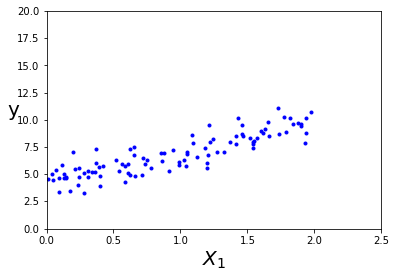

In [5]:
plt.plot(X,y,'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0, fontsize = 20)
plt.axis([0,2.5,0,20])
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)),X]

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)        # putting the vsalues in formulae

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [10]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

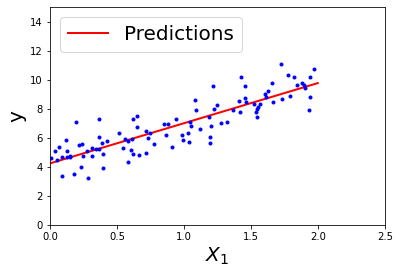

In [11]:
plt.plot(X_new,y_predict, 'r-',linewidth = 2, label = "Predictions")
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.axis([0,2.5,0,15])
plt.legend(fontsize = 20, loc = 'upper left')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [14]:
lin_reg.intercept_ , lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Batch gradient Descent

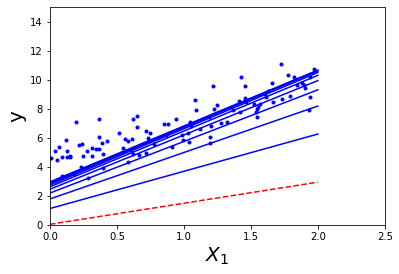

In [16]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
batch_x, batch_y = [],[]

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    if iteration <10:
        y_predict = X_new_b.dot(theta)
        style = 'b-' if iteration > 0 else 'r--' 
        plt.plot(X_new, y_predict,style)
    theta = theta - eta* gradients
    batch_x.append(theta[0])
    batch_y.append(theta[1])
    
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.axis([0,2.5,0,15])
# plt.legend(fontsize = 20, loc = 'upper left')
plt.show()

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

In [18]:
gradients

array([[-3.73034936e-15],
       [ 1.99852839e-15]])

In [19]:
def gradient_descent_check(eta, theta):
    m = len(X_b)    # number of rows/instances in my data
    for iteration in range(1000):
        delta_mse = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        if iteration <10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--' 
            plt.plot(X_new, y_predict,style)
        theta = theta - eta* delta_mse
    plt.plot(X,y,'b.')
    plt.xlabel("$X_1$", fontsize = 20)
    plt.ylabel('y', rotation = 0, fontsize = 20)
    plt.title(f'n{eta}')
    plt.axis([0,2.5,0,15])

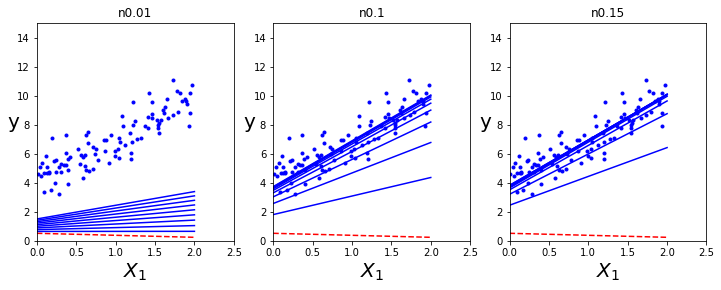

In [20]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(12,4))
plt.subplot(131); gradient_descent_check(.01, theta)
plt.subplot(132); gradient_descent_check(0.1,theta)
plt.subplot(133); gradient_descent_check(0.15,theta)
plt.show()

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(eta0=0.1, random_state=42)
sgd_regressor.fit(X,y.ravel())

SGDRegressor(eta0=0.1, random_state=42)

In [22]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([4.24438563]), array([2.8242988]))

In [23]:
y_perdict_sgd = sgd_regressor.predict(X_new)
y_perdict_sgd

array([4.24438563, 9.89298323])

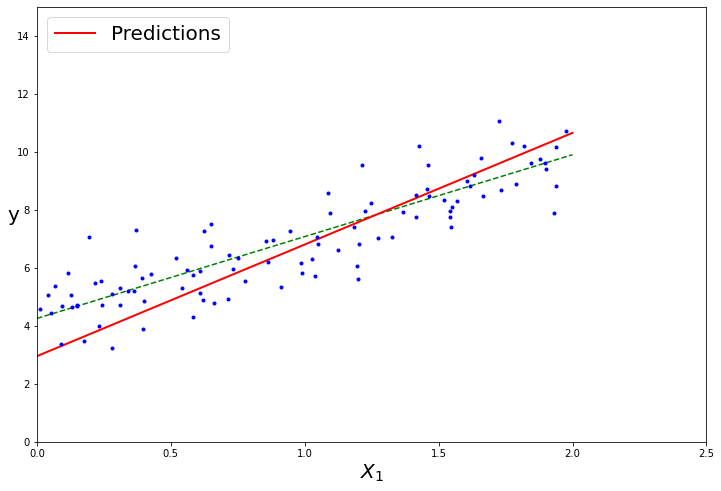

In [24]:
plt.figure(figsize=(12,8))
plt.plot(X_new, y_perdict_sgd, 'g--')
plt.plot(X_new,y_predict, 'r-',linewidth = 2, label = "Predictions")
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', rotation= 0,fontsize = 20)
plt.axis([0,2.5,0,15])
plt.legend(fontsize = 20, loc = 'upper left')
plt.show()

In [25]:
sgd_regressor.score(X,y)

0.7671373026562548

In [26]:
sgd_regressor.n_iter_

11

# Stochastic Gradient Descent

No handles with labels found to put in legend.


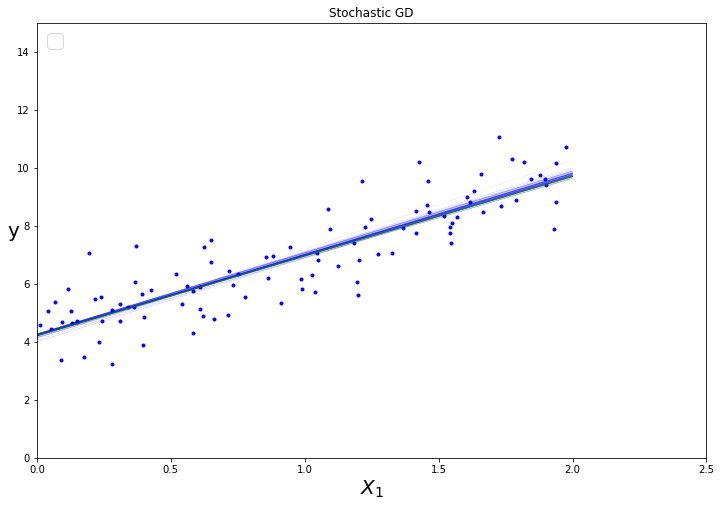

array([[4.20742056],
       [2.74265241]])

In [27]:
t0, t1 = 5, 50                                              # Hyper parameters

def learning_schedule(t):                                   # function for learning schedule or change learning rate with epochs
    return t0/(t+t1)

m = 100                                                     # Number of rows in dataset

epochs = 50
stochastic_x, stochastic_y = [],[]
theta = np.random.randn(2,1)

plt.figure(figsize=(12,8))
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', rotation= 0,fontsize = 20)
plt.axis([0,2.5,0,15])
plt.legend(fontsize = 20, loc = 'upper left')

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi =   y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)- yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    stochastic_x.append(theta[0])
    stochastic_y.append(theta[1])
    y_ = X_new_b.dot(theta)
    style = 'b-' if epoch>0 else 'r--'
    if epoch<=48:
        plt.plot(X_new, y_, style, linewidth = 0.1)
plt.plot(X_new, y_, 'g-', linewidth = 1)
plt.title('Stochastic GD')
plt.show()
theta

# Mini batch Gradient Descent

No handles with labels found to put in legend.


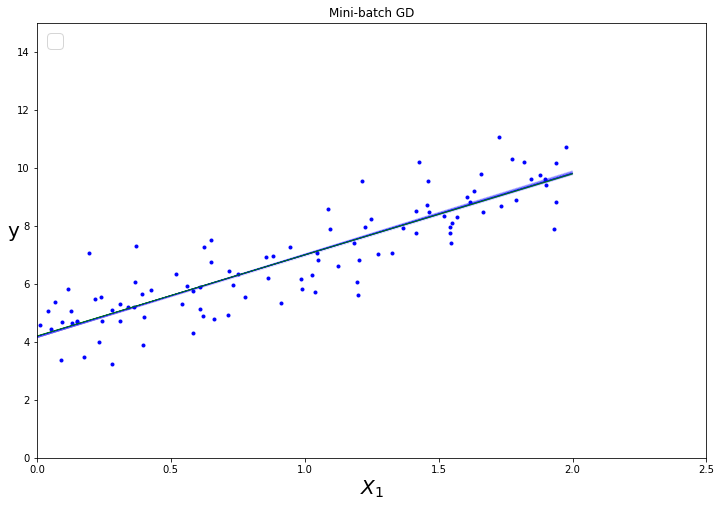

array([[4.19013487],
       [2.79807131]])

In [28]:
t0, t1 = 5, 50                                              # Hyper parameters

def learning_schedule(t):                                   # function for learning schedule or change learning rate with epochs
    return t0/(t+t1)

m = 100                                                     # Number of rows in dataset
epochs = 50

theta = np.random.randn(2,1)
batch_size = 10

plt.figure(figsize=(12,8))
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', rotation= 0,fontsize = 20)
plt.axis([0,2.5,0,15])
plt.legend(fontsize = 20, loc = 'upper left')
mini_x, mini_y = [],[]
for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+batch_size]
        yi =   y[random_index:random_index+batch_size]
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta)- yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    mini_x.append(theta[0])
    mini_y.append(theta[1])    
    y_ = X_new_b.dot(theta)
    style = 'b-' if epoch>0 else 'r--'
    if epoch<=48:
        plt.plot(X_new, y_, style, linewidth = 0.1)
plt.plot(X_new, y_, 'g-', linewidth = 1)
plt.title("Mini-batch GD")
plt.show()
theta

# Plotting the Paths of theta for All 3 Gradient Descent Methods

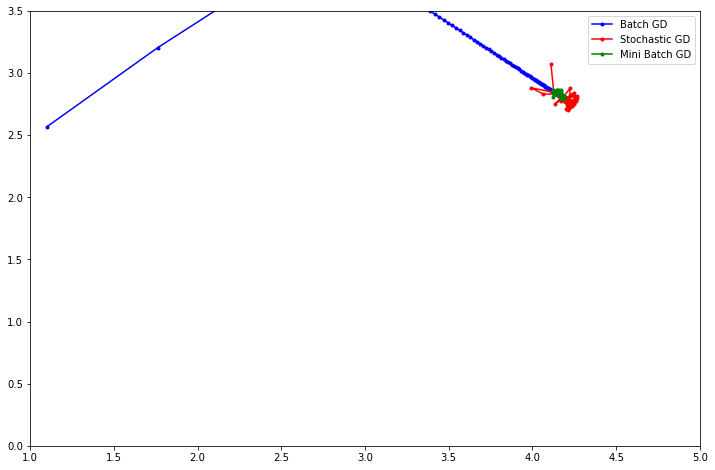

In [29]:
plt.figure(figsize = (12,8))
plt.plot(batch_x,batch_y,'b-', marker = '.', label = 'Batch GD')
plt.plot(stochastic_x,stochastic_y, 'r-', marker = '.', label = 'Stochastic GD')
plt.plot(mini_x,mini_y,'g-', marker = '.', label = 'Mini Batch GD')
plt.axis([1,5,0,3.5])
plt.legend()
plt.show()

# Polynomial Regression

In [30]:
x = 10 * np.random.rand(100,1) - 5

In [31]:
y = 1.8 * x**2 + x + 2  + 20 * np.random.rand(100,1)

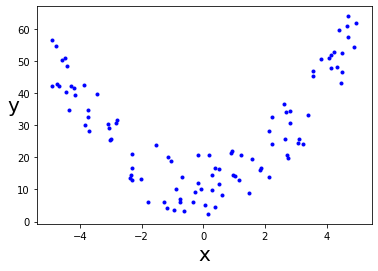

In [32]:
plt.plot(x,y,'b.')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', rotation = 0, fontsize = 20)
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures
ploy_feature = PolynomialFeatures(degree = 3, include_bias = False)

In [34]:
x_poly = ploy_feature.fit_transform(x)
x_poly[0]

array([ 3.56571989, 12.71435831, 45.33584028])

In [35]:
lin_reg_sq = LinearRegression()

In [36]:
lin_reg_sq.fit(x_poly,y)

LinearRegression()

In [37]:
lin_reg_sq.intercept_, lin_reg_sq.coef_

(array([10.92563815]), array([[ 1.19580724,  1.90557174, -0.00961097]]))

In [78]:
x_new = np.linspace(-5,5,100).reshape(100,1)
x_new[0]

array([-5.])

In [79]:
x_new_poly = ploy_feature.fit_transform(x_new)
x_new_poly[0]

array([  -5.,   25., -125.])

In [80]:
y_predict_poly = lin_reg_sq.predict(x_new_poly)

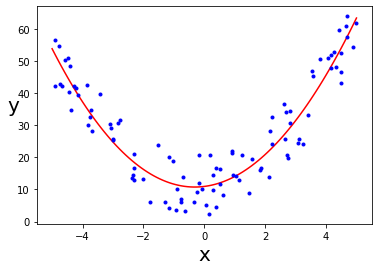

In [81]:
plt.plot(x_new,y_predict_poly,'r-')
plt.plot(x,y,'b.')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', rotation = 0, fontsize = 20)
plt.show()

In [82]:
poly_300 = PolynomialFeatures(degree = 100, include_bias= False)
x_300 = poly_300.fit_transform(x)
x_new_300 = poly_300.fit_transform(x_new)

In [83]:
lin_reg_300 = LinearRegression()

In [84]:
lin_reg_300_ = lin_reg.fit(x_300, y)

In [85]:
y_300 = lin_reg_300_.predict(x_new_300)

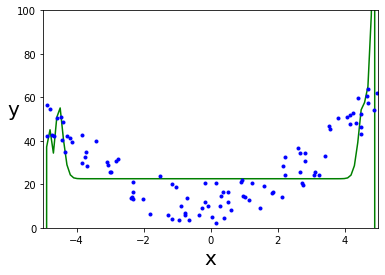

In [89]:
plt.plot(x_new, y_300,'g-')
# plt.plot(x_new,y_predict_poly,'r-')
plt.plot(x,y,'b.')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', rotation = 0, fontsize = 20)
plt.axis([-5,5,0,100])
plt.show()